<a href="https://colab.research.google.com/github/saiyanprince10/ai-projects/blob/dev/IAI_Sp25_HW2_ssuryaar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IAI Assignment 2 - Monte Carlo Tree search
## Author: Suryaa Raman
## Andrew ID: ssuryaar

In [1]:
import numpy as np
import random
import math
from collections import defaultdict

In [2]:
# Class to represent the 4x4 Tic-Tac-Toe game
class TicTacToe4x4:
    def __init__(self, dim=4):
        self.dim = dim
        self.board = np.zeros((dim, dim), dtype=int)
        self.current_player = 1
    def reset(self):
        self.board = np.zeros((self.dim, self.dim), dtype=int)

    def copy(self):
        new_board = TicTacToe4x4(self.dim)
        new_board.board = self.board.copy()
        new_board.current_player = self.current_player
        return new_board

    def available_moves(self):
        # Returns a list of all available moves (empty spaces)
        return [(i, j) for i in range(self.dim) for j in range(self.dim) if self.board[i, j] == 0]
        # return np.argwhere(self.board == 0) - this returns an ndarray, but the comment says we must return a list

    def make_move(self, move:int, player:int):
        # Places the current player's mark on the board
        i, j = move
        if self.board[i, j] == 0:
          self.board[i, j] = player
          return True
        return False
        # Switches turn to the other player
        self.current_player = 3 - self.current_player

    def undo_move(self, move):
        # Removes a move from the board'
        i, j = move
        if self.board[i, j] != 0:
          self.board[i, j] = 0


    def check_winner(self,player:int):
        # Checks if a player has won the game
        # Check rows, columns, and diagonals for a win
        for i in range(self.dim):
            if np.all(self.board[i, :] == player) or np.all(self.board[:, i] == player):
                return True

        if np.all(np.diag(self.board) == player) or np.all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False
    def is_draw(self):
        # Checks if the game is a draw
        return np.all(self.board != 0)

    def display(self):
        print(self.board)

## 1. Both players play randomly

#### Answer: Since both players play randomly, the expectation is that their win rate and scores would be approximately equal

In [3]:
import random
def random_player(board, player):
    moves = board.available_moves()
    return random.choice(moves)

In [4]:
def play_random_game():
    board = TicTacToe4x4()
    current_player = 1
    while True:
        # get a random move
        move = random_player(board, current_player)
        # make the move
        board.make_move(move, current_player)
        # check if the current player is winning
        if board.check_winner(current_player):
            # if yes, end the game
            print('player {} winning!'.format(current_player))
            board.display()
            return current_player
            # break

        # if not, check if it's a draw
        if board.is_draw():
            # if yes, end the game
            print('draw!')
            board.display()
            return 0
            # break

        # switch between Player 1 and 2
        current_player = 3 - current_player

Game 1/200
player 1 winning!
[[0 1 2 2]
 [0 2 1 1]
 [0 2 2 2]
 [1 1 1 1]]
Game 2/200
player 2 winning!
[[2 2 1 0]
 [1 2 2 0]
 [1 0 2 1]
 [1 0 1 2]]
Game 3/200
draw!
[[1 1 2 1]
 [1 2 2 1]
 [2 1 1 2]
 [2 1 2 2]]
Game 4/200
player 2 winning!
[[2 2 2 2]
 [1 0 1 1]
 [2 1 2 1]
 [0 0 1 0]]
Game 5/200
player 1 winning!
[[1 0 0 2]
 [1 1 0 2]
 [2 0 1 2]
 [2 1 0 1]]
Game 6/200
player 2 winning!
[[0 2 2 1]
 [1 1 2 0]
 [0 1 2 2]
 [0 1 2 1]]
Game 7/200
player 1 winning!
[[2 1 2 2]
 [1 1 2 2]
 [1 0 2 2]
 [1 1 1 1]]
Game 8/200
draw!
[[1 2 2 1]
 [1 2 1 1]
 [1 1 2 2]
 [2 1 2 2]]
Game 9/200
draw!
[[2 1 2 2]
 [2 2 1 1]
 [1 1 2 1]
 [1 2 2 1]]
Game 10/200
player 2 winning!
[[1 2 2 1]
 [1 1 2 1]
 [2 1 2 1]
 [2 1 2 2]]
Game 11/200
player 1 winning!
[[1 0 0 2]
 [1 0 0 1]
 [1 2 2 0]
 [1 0 2 0]]
Game 12/200
player 1 winning!
[[1 1 2 2]
 [2 1 2 2]
 [1 0 1 1]
 [2 1 2 1]]
Game 13/200
player 1 winning!
[[2 2 1 1]
 [2 2 2 0]
 [1 1 1 1]
 [1 2 1 2]]
Game 14/200
draw!
[[2 1 1 1]
 [1 2 2 2]
 [1 2 1 1]
 [2 2 2 1]]
Game 15

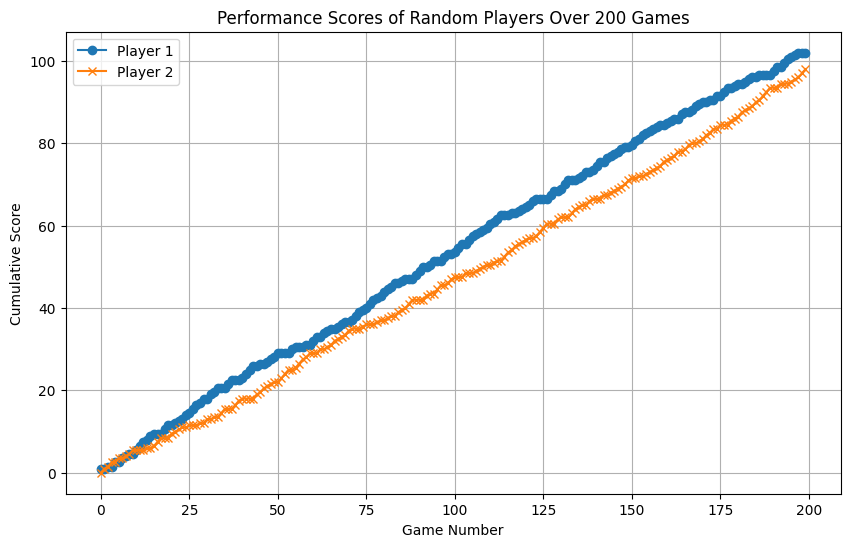

In [9]:
import matplotlib.pyplot as plt

# Play the game 200 times and keep track of the results
n_games = 200
scores = {1:0,2:0}
cumulative_scores_p1 = []
cumulative_scores_p2 = []
for i in range(n_games):
    print('Game {}/{}'.format(i+1,n_games))
    result = play_random_game()
    if result ==1:
      scores[1] += 1
    elif result == 2:
      scores[2] += 1
    else:
      scores[1] += 0.5
      scores[2] += 0.5
    cumulative_scores_p1.append(scores[1])
    cumulative_scores_p2.append(scores[2])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_games), cumulative_scores_p1, marker='o', label='Player 1')
plt.plot(range(n_games), cumulative_scores_p2, marker='x', label='Player 2')
plt.title(f'Performance Scores of Random Players Over {n_games} Games')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Score')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
## Scores of players
scores

{1: 102.0, 2: 98.0}

Game 1/600
player 2 winning!
[[1 1 1 2]
 [2 2 2 2]
 [2 1 1 2]
 [2 1 1 1]]
Game 2/600
player 2 winning!
[[2 0 1 0]
 [2 1 1 2]
 [2 1 0 1]
 [2 2 0 1]]
Game 3/600
player 1 winning!
[[1 2 1 0]
 [0 2 1 0]
 [2 2 1 0]
 [0 1 1 2]]
Game 4/600
draw!
[[2 1 2 2]
 [1 1 2 2]
 [2 1 2 1]
 [1 2 1 1]]
Game 5/600
draw!
[[1 2 1 2]
 [2 2 2 1]
 [1 1 1 2]
 [1 1 2 2]]
Game 6/600
player 2 winning!
[[1 2 2 1]
 [0 2 1 1]
 [1 2 2 2]
 [0 2 1 1]]
Game 7/600
player 1 winning!
[[0 1 1 0]
 [0 2 1 0]
 [0 0 1 2]
 [0 2 1 2]]
Game 8/600
player 2 winning!
[[2 2 1 1]
 [2 1 1 1]
 [2 2 1 2]
 [2 1 2 1]]
Game 9/600
draw!
[[2 2 2 1]
 [2 1 2 1]
 [2 1 2 1]
 [1 1 1 2]]
Game 10/600
player 1 winning!
[[2 1 2 2]
 [1 1 1 1]
 [1 1 1 2]
 [2 0 2 2]]
Game 11/600
player 2 winning!
[[2 2 1 2]
 [1 2 1 1]
 [1 1 2 2]
 [2 1 1 2]]
Game 12/600
player 2 winning!
[[0 1 1 2]
 [0 1 0 1]
 [0 1 2 1]
 [2 2 2 2]]
Game 13/600
player 1 winning!
[[1 1 2 2]
 [2 1 0 2]
 [2 2 1 1]
 [1 2 1 1]]
Game 14/600
player 1 winning!
[[2 0 0 1]
 [1 2 1 2]
 [1 1 0 2]
 [1 0 0

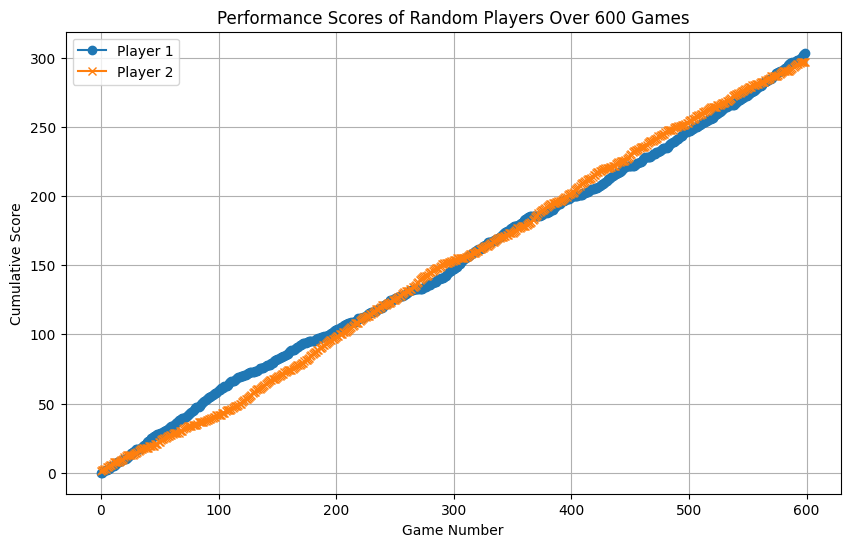

In [28]:
# Play the game 600 times and keep track of the results
n_games_2 = 600
scores_2 = {1:0,2:0}
scores_p1 = []
scores_p2 = []
for i in range(n_games_2):
    print('Game {}/{}'.format(i+1,n_games_2))
    result = play_random_game()
    if result ==1:
      scores_2[1] += 1
    elif result == 2:
      scores_2[2] += 1
    else:
      scores_2[1] += 0.5
      scores_2[2] += 0.5
    scores_p1.append(scores_2[1])
    scores_p2.append(scores_2[2])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_games_2), scores_p1, marker='o', label='Player 1')
plt.plot(range(n_games_2), scores_p2, marker='x', label='Player 2')
plt.title(f'Performance Scores of Random Players Over {n_games_2} Games')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Score')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
scores_2

{1: 303.5, 2: 296.5}

## 2. Monte-Carlo Tree Search

In [18]:
# Monte Carlo Tree Search Node
class MCTSNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.score = 0
        self.visits = 0

    def update_stats(self,result):
      self.visits += 1
      if result ==1:
        self.score += 1
      elif result == 0:
        self.score += 0.5

    def add_child(self, child_node):
        self.children.append(child_node)

    def is_fully_expanded(self):
        return len(self.children) == len(self.state.available_moves())

    def best_child(self, exploration_weight=1.4):
      best_score = float('-inf')
      best_child = None
      for child in self.children:
        if child.visits == 0:
          return child
        ucb_score = (child.score / child.visits) + exploration_weight * math.sqrt(math.log(self.visits) / child.visits)
        if ucb_score > best_score:
          best_score = ucb_score
          best_child = child
      return best_child

In [19]:
# Monte Carlo Tree Search Algorithm
class MCTS:
   def __init__(self, itermax=1000, exploration_weight=1.4):
        self.itermax = itermax
        self.exploration_weight = exploration_weight
        self.root = None

   def search(self, state):
        self.root = MCTSNode(state)
        for _ in range(self.itermax):
            node = self.root
            # While node is fully expanded and has children
            while node.is_fully_expanded() and node.children:
                node = node.best_child(self.exploration_weight)
            # Selection, expansion, simulation, backpropogation
            if not node.is_fully_expanded():
                self._expand(node)
                child_node = random.choice(node.children)
                simulation_result = self._simulate(child_node.state)
                self._backpropagate(child_node, simulation_result)
        return self.root

   def _expand(self, node):
        # Expansion phase - add new children nodes
        for move in node.state.available_moves():
            new_state = TicTacToe4x4()
            new_state.board = node.state.board.copy()
            new_state.current_player = node.state.current_player
            new_state.make_move(move ,new_state.current_player)
            child_node = MCTSNode(new_state, parent=node)
            node.add_child(child_node)

   def _simulate(self, state):
        # Simulation phase - play a random game
        current_state = TicTacToe4x4()
        current_state.board = state.board.copy()
        current_state.current_player = state.current_player
        while not (current_state.check_winner(current_state.current_player) or current_state.is_draw()):
            moves = current_state.available_moves()
            move = random.choice(moves)
            current_state.make_move(move, current_state.current_player)
            current_state.current_player = 3 - current_state.current_player
        # Return the result of the simulation
        return current_state.check_winner(3 - current_state.current_player)

   def _backpropagate(self, node, result):
        # Backpropagation phase - update values up the tree
        while node is not None:
            node.update_stats(result)
            # Invert result for opponent
            result = 1-result if result != 0 else 0
            node = node.parent

In [20]:
# Function to simulate a game between MCTS and a random player
def play_game():
    board = TicTacToe4x4()
    mcts = MCTS()
    current_player = 1

    while True:
      # Check who is current player
      if current_player == 1:
        #MCTS makes move
        mcts.search(board)
        best_child = mcts.root.best_child()
        available_moves = board.available_moves()
        for move in available_moves:
          temp_board = TicTacToe4x4()
          temp_board.board = board.board.copy()
          temp_board.make_move(move, current_player)
          if np.array_equal(temp_board.board, best_child.state.board):
            board.make_move(move, current_player)
            break
      else:
        #Random player makes move
        move = random_player(board, current_player)
        board.make_move(move,current_player)
      #check if current player is winning
      if board.check_winner(current_player):
        print('player {} winning!'.format(current_player))
        board.display()
        return current_player
      #if not, check if it's a draw
      if board.is_draw():
        print('draw!')
        board.display()
        return 0
      #switch between Player 1 and 2
      current_player = 3 - current_player

Game 1/200
draw!
[[1 2 2 2]
 [2 1 2 1]
 [1 1 2 2]
 [2 1 1 1]]
Game 2/200
draw!
[[1 2 1 2]
 [1 1 1 2]
 [1 2 2 1]
 [2 2 1 2]]
Game 3/200
draw!
[[2 1 2 1]
 [2 1 1 2]
 [1 2 2 1]
 [2 2 1 1]]
Game 4/200
player 1 winning!
[[1 1 2 1]
 [0 1 0 2]
 [1 2 1 2]
 [0 2 2 1]]
Game 5/200
player 1 winning!
[[1 1 0 2]
 [1 1 1 2]
 [1 2 2 1]
 [1 2 2 2]]
Game 6/200
player 2 winning!
[[2 1 0 2]
 [1 1 0 2]
 [1 2 1 2]
 [1 2 1 2]]
Game 7/200
player 1 winning!
[[1 1 1 1]
 [2 0 2 2]
 [1 2 0 0]
 [0 0 0 0]]
Game 8/200
player 2 winning!
[[1 1 2 1]
 [0 1 2 1]
 [2 0 2 2]
 [2 1 2 1]]
Game 9/200
player 1 winning!
[[1 2 2 2]
 [2 2 1 1]
 [1 2 2 0]
 [1 1 1 1]]
Game 10/200
player 2 winning!
[[2 1 2 1]
 [1 0 2 1]
 [1 2 2 0]
 [1 1 2 2]]
Game 11/200
player 1 winning!
[[1 2 1 1]
 [2 2 1 1]
 [1 1 2 2]
 [1 0 2 2]]
Game 12/200
draw!
[[1 2 2 2]
 [2 1 1 1]
 [1 1 2 2]
 [1 2 2 1]]
Game 13/200
player 2 winning!
[[2 1 2 1]
 [1 2 1 1]
 [1 1 2 1]
 [2 2 2 2]]
Game 14/200
player 1 winning!
[[1 1 1 2]
 [1 1 1 1]
 [1 2 2 2]
 [2 0 2 2]]
Game 15

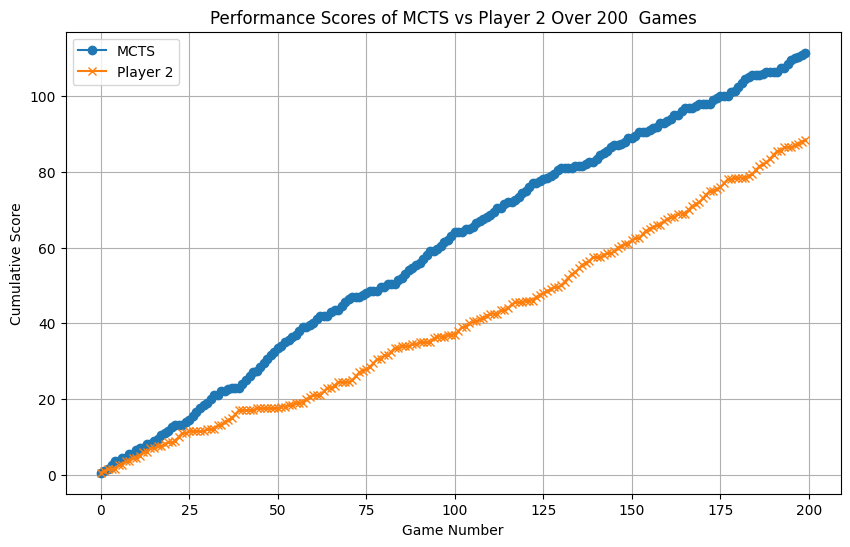

In [24]:
# Play the game 200 times and keep track of the results
n_mcts_games = 200
mcts_scores = {1:0,2:0}
cumul_scores_mcts = []
cumul_scores_p2 = []
for i in range(n_mcts_games):
    print('Game {}/{}'.format(i+1,n_mcts_games))
    result_2 = play_game()
    if result_2 ==1:
      mcts_scores[1] += 1
    elif result_2 == 2:
      mcts_scores[2] += 1
    else:
      mcts_scores[1] += 0.5
      mcts_scores[2] += 0.5
    cumul_scores_mcts.append(mcts_scores[1])
    cumul_scores_p2.append(mcts_scores[2])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_mcts_games), cumul_scores_mcts, marker='o', label='MCTS')
plt.plot(range(n_mcts_games), cumul_scores_p2, marker='x', label='Player 2')
plt.title(f"Performance Scores of MCTS vs Player 2 Over {n_mcts_games}  Games")
plt.xlabel('Game Number')
plt.ylabel('Cumulative Score')
plt.grid(True)
plt.legend()
plt.show()

### Scores of players

In [25]:
mcts_scores

{1: 111.5, 2: 88.5}

Game 1/600
draw!
[[1 1 2 2]
 [1 1 1 2]
 [1 1 2 2]
 [2 2 2 1]]
Game 2/600
draw!
[[1 2 2 2]
 [2 1 1 1]
 [1 2 2 1]
 [1 2 2 1]]
Game 3/600
player 1 winning!
[[1 1 2 2]
 [1 2 1 2]
 [1 0 2 1]
 [1 2 1 2]]
Game 4/600
player 1 winning!
[[1 1 2 2]
 [1 2 1 0]
 [1 1 2 2]
 [1 0 0 2]]
Game 5/600
draw!
[[1 1 2 1]
 [1 2 2 1]
 [1 2 1 2]
 [2 2 2 1]]
Game 6/600
player 1 winning!
[[1 2 1 2]
 [2 1 1 0]
 [1 0 1 2]
 [0 2 1 2]]
Game 7/600
player 1 winning!
[[1 1 2 2]
 [2 1 1 2]
 [1 1 1 1]
 [2 0 2 2]]
Game 8/600
player 2 winning!
[[2 1 2 1]
 [1 2 1 2]
 [1 0 2 2]
 [1 1 0 2]]
Game 9/600
draw!
[[2 1 1 1]
 [2 1 2 1]
 [1 2 2 2]
 [1 2 1 2]]
Game 10/600
player 2 winning!
[[1 1 1 2]
 [2 1 1 1]
 [2 2 2 2]
 [2 1 1 2]]
Game 11/600
player 1 winning!
[[2 1 2 1]
 [2 1 1 0]
 [1 1 0 2]
 [2 1 0 2]]
Game 12/600
player 1 winning!
[[2 1 2 0]
 [2 1 1 1]
 [1 1 1 2]
 [2 1 2 2]]
Game 13/600
player 1 winning!
[[1 2 1 1]
 [1 2 1 1]
 [1 2 2 2]
 [1 0 2 2]]
Game 14/600
draw!
[[1 1 2 1]
 [1 1 2 2]
 [1 2 2 2]
 [2 1 1 2]]
Game 15/600
player 

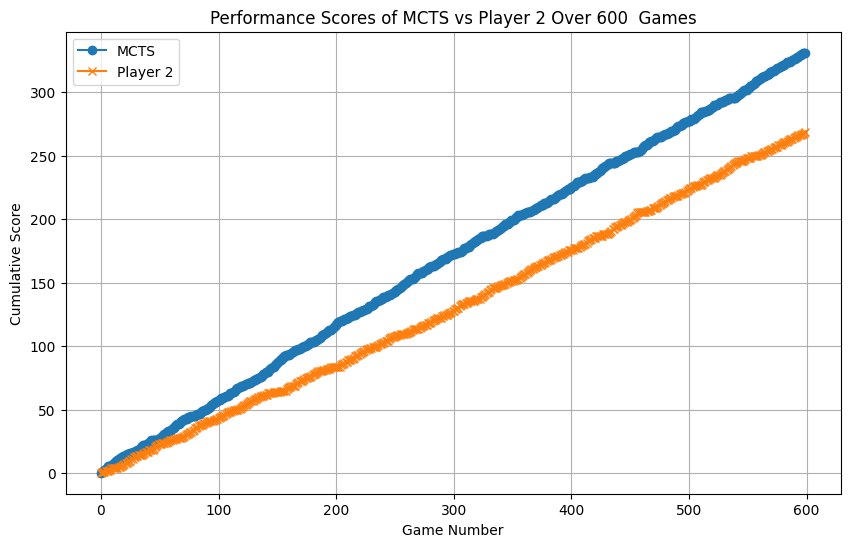

In [26]:
# Play the game 600 times and keep track of the results
n_mcts_games = 600
mcts_scores_2 = {1:0,2:0}
cumul_scores_mcts = []
cumul_scores_p2 = []
for i in range(n_mcts_games):
    print('Game {}/{}'.format(i+1,n_mcts_games))
    result_2 = play_game()
    if result_2 ==1:
      mcts_scores_2[1] += 1
    elif result_2 == 2:
      mcts_scores_2[2] += 1
    else:
      mcts_scores_2[1] += 0.5
      mcts_scores_2[2] += 0.5
    cumul_scores_mcts.append(mcts_scores_2[1])
    cumul_scores_p2.append(mcts_scores_2[2])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_mcts_games), cumul_scores_mcts, marker='o', label='MCTS')
plt.plot(range(n_mcts_games), cumul_scores_p2, marker='x', label='Player 2')
plt.title(f"Performance Scores of MCTS vs Player 2 Over {n_mcts_games}  Games")
plt.xlabel('Game Number')
plt.ylabel('Cumulative Score')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
mcts_scores_2

{1: 331.0, 2: 269.0}

### 3. MCTS performs much better than random player 1.
1. In 200 games, it performs better than random player with 111.5 to player 2's 88.5. The random game was much more even with a score of 102 - 98
2. In 600 games, its performance improves even more with a win rate of 331 - 269. In comparison, the random game was even-stevens at 303.5 - 2: 296.5

## 4. Win rate exploration versus exploration weight

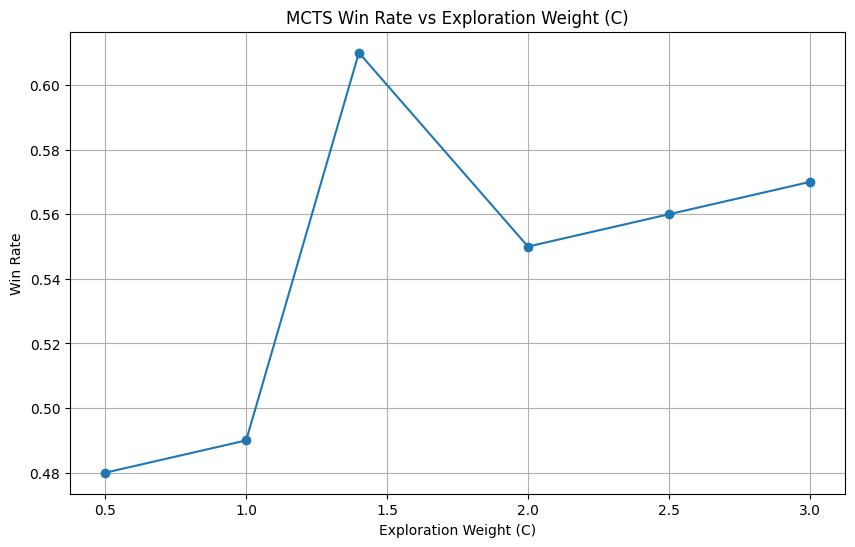

In [23]:
def test_exploration_weight(c_values, n_games=50):
    win_rates = []
    for c in c_values:
        wins = 0
        for _ in range(n_games):
            board = TicTacToe4x4()
            mcts = MCTS(exploration_weight=c)
            current_player = 1

            while True:
                if current_player == 1:
                    mcts.search(board)
                    best_child = mcts.root.best_child()
                    available_moves = board.available_moves()
                    for move in available_moves:
                        temp_board = board.copy()
                        temp_board.make_move(move, current_player)
                        if np.array_equal(temp_board.board, best_child.state.board):
                            board.make_move(move, current_player)
                            break
                else:
                    move = random_player(board, current_player)
                    board.make_move(move, current_player)

                if board.check_winner(current_player):
                    if current_player == 1:
                        wins += 1
                    break
                if board.is_draw():
                    wins += 0.5
                    break
                current_player = 3 - current_player

        win_rates.append(wins/n_games)

    plt.figure(figsize=(10, 6))
    plt.plot(c_values, win_rates, marker='o')
    plt.title('MCTS Win Rate vs Exploration Weight (C)')
    plt.xlabel('Exploration Weight (C)')
    plt.ylabel('Win Rate')
    plt.grid(True)
    plt.show()

# Test range of C values
c_values = [0.5, 1.0, 1.4, 2.0, 2.5, 3.0]
test_exploration_weight(c_values)

#### Ans - the above plot indicates that 1.4 is the best value for C in the UCT score calculation